# Plotting with Panda's DataFrames

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
car_sales = pd.read_csv("_data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


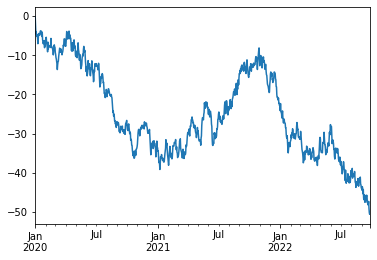

In [9]:
ts = pd.Series(
    np.random.randn(1000),
    index=pd.date_range('1/1/2020',periods=1000)
)
ts = ts.cumsum()
ts.plot();